In [1]:
# Auto reload %
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
datafile = "data/traindata.csv"
devfile = "data/devdata.csv"

In [4]:
def preprocess(datafile):
    column_names = ['label', 'aspect', 'word', 'pos', 'sentence']
    df = pd.read_csv(datafile, sep='\t', header=None, names=column_names)

    # Process the 'pos' column into two integer columns 'start_word' and 'end_word'
    df['start_word'] = df['pos'].apply(lambda x: int(x.split(':')[0]))
    df['end_word'] = df['pos'].apply(lambda x: int(x.split(':')[1]))

    # Process the 'label' column into a list of integers
    label_enum = {
        "neutral": 0,
        "positive": 1,
        "negative": 2
    }
    df['label'] = df['label'].apply(lambda x: label_enum[x])
    df['theme'] = df['aspect'].apply(lambda x: x.split('#')[0])
    df['subtheme'] = df['aspect'].apply(lambda x: x.split('#')[1])

    le = LabelEncoder()
    df['theme_encoded'] = le.fit_transform(df['theme'])
    df['subtheme_encoded'] = le.fit_transform(df['subtheme'])

    return df

In [5]:
dev_df = preprocess(devfile)
train_df = preprocess(datafile)

c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Pro

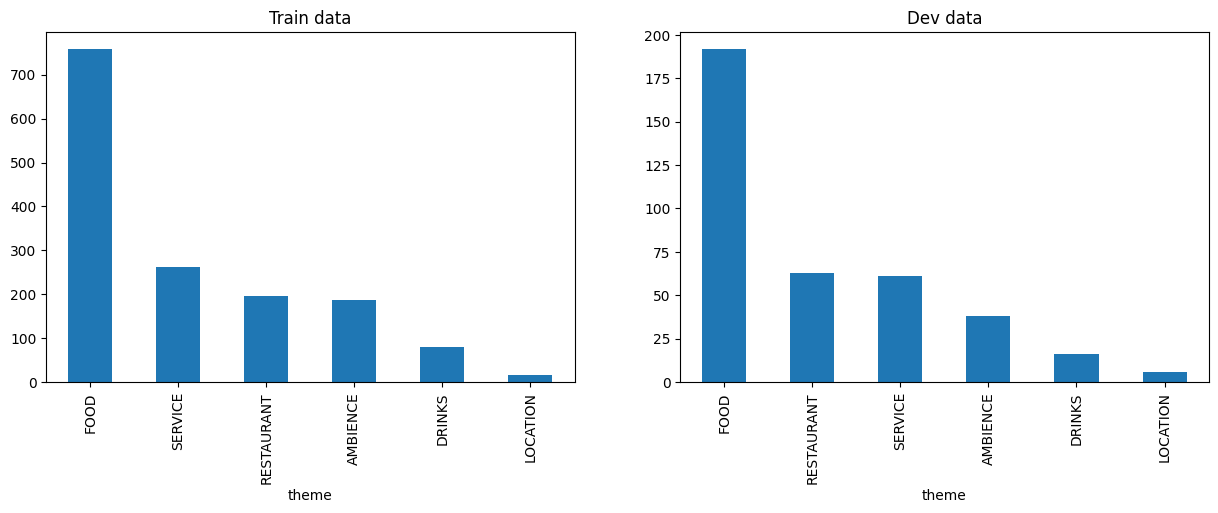

In [6]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
# Order the themes by frequency and plot histogram
train_df['theme'].value_counts().plot(kind='bar')
plt.title("Train data")
plt.subplot(2, 2, 2)
dev_df['theme'].value_counts().plot(kind='bar')
plt.title("Dev data")
plt.show()

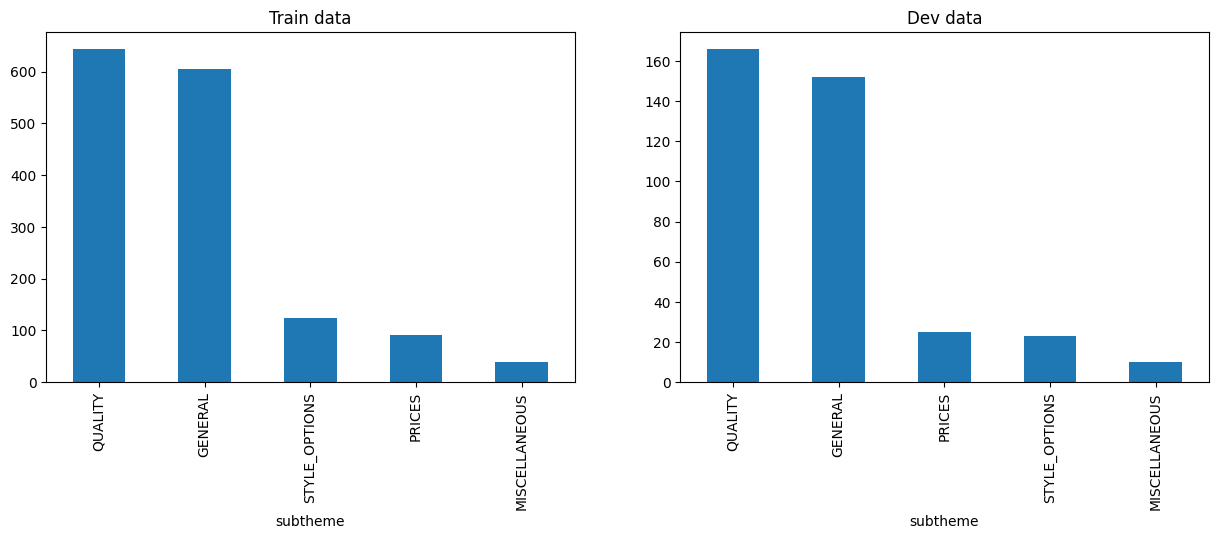

In [7]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
# Order the themes by frequency and plot histogram
train_df['subtheme'].value_counts().plot(kind='bar')
plt.title("Train data")
plt.subplot(2, 2, 2)
dev_df['subtheme'].value_counts().plot(kind='bar')
plt.title("Dev data")
plt.show()

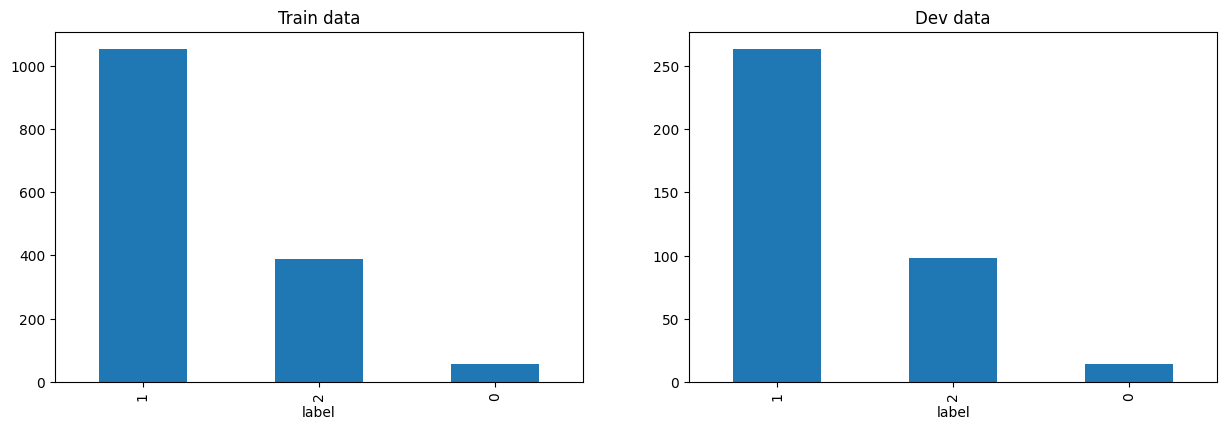

In [8]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
# Order the themes by frequency and plot histogram
train_df['label'].value_counts().plot(kind='bar')
plt.title("Train data")
plt.subplot(2, 2, 2)
dev_df['label'].value_counts().plot(kind='bar')
plt.title("Dev data")
plt.show()

In [9]:
# DistilBERT tokenizer
from transformers import DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Tokenize the sentences and create a length column
train_df['tokenized'] = train_df['sentence'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
train_df['length'] = train_df['tokenized'].apply(lambda x: len(x))

dev_df['tokenized'] = dev_df['sentence'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
dev_df['length'] = dev_df['tokenized'].apply(lambda x: len(x))

In [11]:
# Print the maximum length of the tokenized sentences
print("Maximum length of tokenized sentences in train data:", train_df['length'].max())
print("Maximum length of tokenized sentences in dev data:", dev_df['length'].max())

Maximum length of tokenized sentences in train data: 92
Maximum length of tokenized sentences in dev data: 92


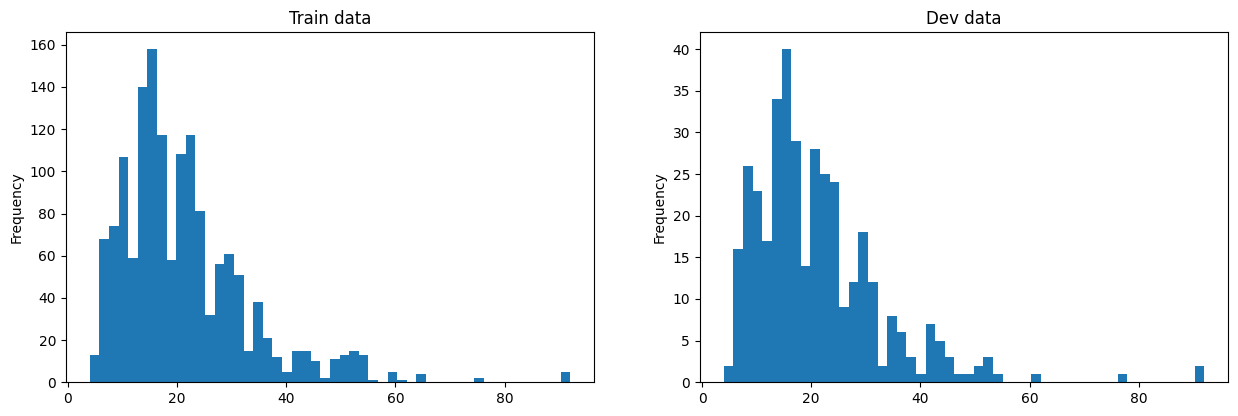

In [12]:
# Show the length distribution
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
train_df['length'].plot(kind='hist', bins=50)
plt.title("Train data")
plt.subplot(2, 2, 2)
dev_df['length'].plot(kind='hist', bins=50)
plt.title("Dev data")
plt.show()

In [13]:
# Sep token
print(tokenizer.sep_token_id)

102


In [14]:
# Tokenize word [sep] theme [sep] subtheme [sep] sentence
def tokenize(row):
    return tokenizer.encode(
        row['word'] + tokenizer.sep_token +
        row['theme'] + tokenizer.sep_token +
        row['subtheme'] + tokenizer.sep_token +
        row['sentence'], add_special_tokens=True
    )

train_df['tokens'] = train_df.apply(tokenize, axis=1)
dev_df['tokens'] = dev_df.apply(tokenize, axis=1)

In [15]:
# Decode the first 5 rows of the dataframe col = tokenized_word_theme_subtheme_sentence
for row in (list(train_df['tokens'].head())):
    print(row)
    print(tokenizer.decode(row))

[101, 10747, 102, 2572, 11283, 5897, 102, 2236, 102, 2460, 1998, 4086, 1516, 10747, 2003, 2307, 1024, 2009, 1005, 1055, 6298, 1010, 26931, 1998, 2797, 1012, 102]
[CLS] seating [SEP] ambience [SEP] general [SEP] short and sweet – seating is great : it's romantic, cozy and private. [SEP]
[101, 19817, 19321, 11069, 102, 2572, 11283, 5897, 102, 2236, 102, 2023, 24209, 22325, 1998, 6298, 19817, 19321, 11069, 2003, 2012, 1996, 2327, 1997, 2026, 7128, 4825, 2862, 1012, 102]
[CLS] trattoria [SEP] ambience [SEP] general [SEP] this quaint and romantic trattoria is at the top of my manhattan restaurant list. [SEP]
[101, 2833, 102, 2833, 102, 3737, 102, 1996, 2031, 2058, 2531, 2367, 18007, 2000, 3749, 16215, 3771, 4113, 2061, 2008, 2081, 2026, 3129, 2200, 3407, 1998, 1996, 2833, 2001, 12090, 1010, 2065, 1045, 2442, 16755, 1037, 9841, 2009, 2442, 2022, 1996, 16405, 2213, 4939, 17153, 9834, 5498, 1012, 102]
[CLS] food [SEP] food [SEP] quality [SEP] the have over 100 different beers to offer thier gu

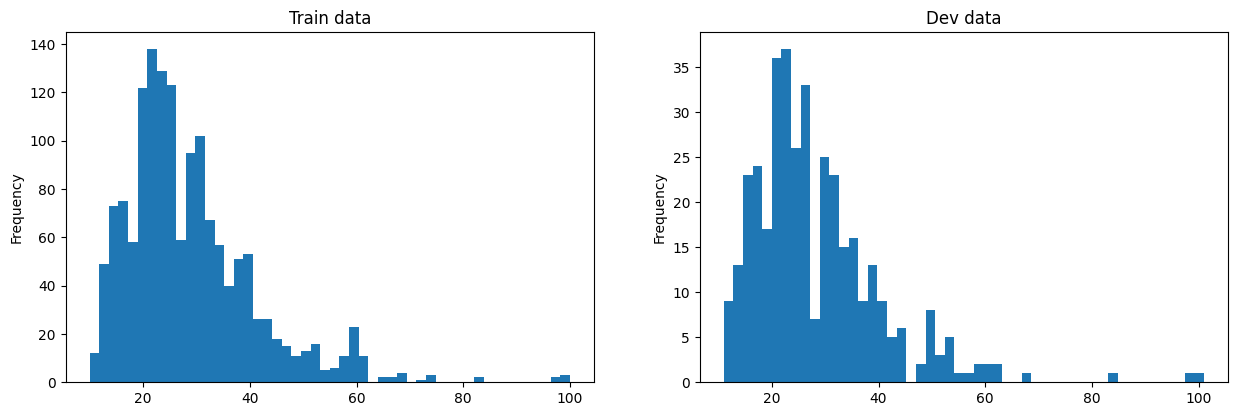

In [16]:
# Plot the histogram of the length of the tokenized_word_theme_subtheme_sentence
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
train_df['tokens'].apply(lambda x: len(x)).plot(kind='hist', bins=50)
plt.title("Train data")
plt.subplot(2, 2, 2)
dev_df['tokens'].apply(lambda x: len(x)).plot(kind='hist', bins=50)
plt.title("Dev data")
plt.show()

In [17]:
# Tokenize and return the attention mask
def tokenize_and_mask(row):
    result = tokenizer.encode_plus(
        row['word'] + tokenizer.sep_token +
        row['theme'] + tokenizer.sep_token +
        row['subtheme'] + tokenizer.sep_token +
        row['sentence'], add_special_tokens=True, max_length=512, pad_to_max_length=True, return_attention_mask=True)
    return result['input_ids'], result['attention_mask']

In [18]:
# Create two new columns in the dataframe
train_df['full_tokens'], train_df['full_attention_mask'] = zip(*train_df.apply(tokenize_and_mask, axis=1))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\transformers\tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [19]:
train_df['full_tokens']

0       [101, 10747, 102, 2572, 11283, 5897, 102, 2236...
1       [101, 19817, 19321, 11069, 102, 2572, 11283, 5...
2       [101, 2833, 102, 2833, 102, 3737, 102, 1996, 2...
3       [101, 3095, 102, 2326, 102, 2236, 102, 2023, 3...
4       [101, 12183, 102, 2833, 102, 2806, 1035, 7047,...
                              ...                        
1498    [101, 4671, 2080, 102, 8974, 102, 3737, 102, 2...
1499    [101, 13877, 102, 2326, 102, 2236, 102, 1996, ...
1500    [101, 2173, 102, 4825, 102, 7597, 102, 2023, 2...
1501    [101, 4825, 102, 4825, 102, 2236, 102, 3835, 2...
1502    [101, 7224, 102, 2572, 11283, 5897, 102, 2236,...
Name: full_tokens, Length: 1503, dtype: object

In [20]:
from src.dataset import AspectDataset

# Create the dataset
train_dataset = AspectDataset(datafile=datafile, tokenizer=tokenizer)

c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Pro

In [21]:
from torch.utils.data import Dataset, DataLoader

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [22]:
# Sample the first batch
for batch in train_loader:
    # Print the name of the columns in the batch
    print(batch.keys())
    # Decode the first sentence in the batch
    for decoded in tokenizer.batch_decode(batch['input_ids']):
        print(decoded)
    break

dict_keys(['input_ids', 'attention_mask', 'label', 'theme', 'subtheme', 'start_word', 'end_word'])
[CLS] staff [SEP] service [SEP] general [SEP] the staff is incredibly helpful and attentive. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [23]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [24]:
from src.model import AspectModel

# Create the model
model = AspectModel(num_labels=3).to(device)

c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\transformers\utils\generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [26]:
input_ids = batch['input_ids'].to(device)
attention_mask = batch['attention_mask'].to(device)
labels = batch['label'].to(device)
theme = batch['theme'].to(device)
subtheme = batch['subtheme'].to(device)
start_word = batch['start_word'].to(device)
end_word = batch['end_word'].to(device)

outputs = model.distilbert(input_ids, attention_mask)
text_features = outputs['last_hidden_state'][:, 0, :]
text_features = model.dropout(text_features)

In [27]:
print('Shape of text features:', text_features.shape)
print(theme, subtheme, start_word, end_word)

additional_features = torch.concat([theme.unsqueeze(1), subtheme.unsqueeze(1), start_word.unsqueeze(1), end_word.unsqueeze(1)], dim=-1)
print('Shape of additional features:', additional_features.shape)

all_features = torch.cat((text_features, additional_features), dim=-1)
print('Shape of all features:', all_features.shape)

Shape of text features: torch.Size([8, 768])
tensor([5, 3, 2, 5, 2, 5, 4, 2], device='cuda:0', dtype=torch.int32) tensor([0, 0, 3, 0, 3, 0, 1, 3], device='cuda:0', dtype=torch.int32) tensor([  4,   4,   0,  82,  26,  34,  40, 106], device='cuda:0') tensor([  9,   9,   4,  91,  37,  41,  44, 125], device='cuda:0')
Shape of additional features: torch.Size([8, 4])
Shape of all features: torch.Size([8, 772])


In [39]:
from src.classifier import Classifier, Config

# Create the classifier
config = Config()
print(config)
classifier = Classifier(config)

Config(batch_size=32, learning_rate=0.003, num_epochs=5, num_labels=3, model_name='distilbert-base-uncased')
Using model: distilbert-base-uncased
Number of labels: 3


In [40]:
classifier.train(datafile, devfile, device=device)

c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Processing\nlp_assignment\nlpenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Antoine\Study\CentraleSupélec\3A\SM10\Natural Language Pro

Training model for 5 epochs on device cuda
Epoch 1/5
Training:


OutOfMemoryError: CUDA out of memory. Tried to allocate 96.00 MiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 12.31 GiB is allocated by PyTorch, and 91.52 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)